In [1]:
using JSON, Graphs, GraphPlot, ProgressMeter, Statistics, Plots, LaTeXStrings

include("./BDFS.jl")
using .BDFS

In [2]:
allGraphs = Dict{Int, Vector{SimpleGraph{Int64}}}()
@showprogress for n in 3:7
    gr_n = SimpleGraph{Int64}[]
    json_string = read("./AllGraphs/all_$n.json", String)
    graphs_n = [Vector{Vector{Int}}(a) for a in JSON.parse(json_string)]
    for graph in graphs_n
        for couple in graph
            couple .+= 1
        end
    end
    
    for gr in graphs_n
        g = SimpleGraph(n)
        for (a, b) in gr
            add_edge!(g, a, b)
        end
        push!(gr_n, g)
    end
    allGraphs[n] = gr_n
end
allGraphs

Progress: 100%|█████████████████████████████████████████| Time: 0:01:04


Dict{Int64, Vector{SimpleGraph{Int64}}} with 5 entries:
  5 => [SimpleGraph{Int64}(10, [[2, 3, 4, 5], [1, 3, 4, 5], [1, 2, 4, 5], [1, 2…
  4 => [SimpleGraph{Int64}(6, [[2, 3, 4], [1, 3, 4], [1, 2, 4], [1, 2, 3]]), Si…
  6 => [SimpleGraph{Int64}(15, [[2, 3, 4, 5, 6], [1, 3, 4, 5, 6], [1, 2, 4, 5, …
  7 => [SimpleGraph{Int64}(21, [[2, 3, 4, 5, 6, 7], [1, 3, 4, 5, 6, 7], [1, 2, …
  3 => [SimpleGraph{Int64}(3, [[2, 3], [1, 3], [1, 2]]), SimpleGraph{Int64}(2, …

# Первый ориентир
### "Трудоёмкость в среднем для нумерованных графов"

In [3]:
ψ_all = Dict()
@showprogress for n in 3:7
    ψ_all[n] = filter(isfinite, [BDFS.phi(g) for g in allGraphs[n]] ) |> mean
end
ψ_all

Progress: 100%|█████████████████████████████████████████| Time: 0:00:44


Dict{Any, Any} with 5 entries:
  5 => 1.11351
  4 => 1.05957
  6 => 1.18108
  7 => 1.25441
  3 => 1.02315

### Классы изоморфных графов

In [4]:
isoGraphs = Dict{Int, Vector{SimpleGraph{Int64}}}()
@showprogress for n in 3:7
    gr_n = SimpleGraph{Int64}[]
    json_string = read("./AllGraphs/isomorphs_$n.json", String)
    graphs_n = [Vector{Vector{Int}}(a) for a in JSON.parse(json_string)]
    for graph in graphs_n
        for couple in graph
            couple .+= 1
        end
    end
    
    for gr in graphs_n
        g = SimpleGraph(n)
        for (a, b) in gr
            add_edge!(g, a, b)
        end
        push!(gr_n, g)
    end
    isoGraphs[n] = gr_n
end
isoGraphs

Dict{Int64, Vector{SimpleGraph{Int64}}} with 5 entries:
  5 => [SimpleGraph{Int64}(10, [[2, 3, 4, 5], [1, 3, 4, 5], [1, 2, 4, 5], [1, 2…
  4 => [SimpleGraph{Int64}(6, [[2, 3, 4], [1, 3, 4], [1, 2, 4], [1, 2, 3]]), Si…
  6 => [SimpleGraph{Int64}(15, [[2, 3, 4, 5, 6], [1, 3, 4, 5, 6], [1, 2, 4, 5, …
  7 => [SimpleGraph{Int64}(21, [[2, 3, 4, 5, 6, 7], [1, 3, 4, 5, 6, 7], [1, 2, …
  3 => [SimpleGraph{Int64}(3, [[2, 3], [1, 3], [1, 2]]), SimpleGraph{Int64}(2, …

In [5]:
ψ_iso = Dict()
@showprogress for n in 3:7
    ψ_iso[n] = filter(isfinite, [BDFS.phi(g) for g in isoGraphs[n]] ) |> mean
end
ψ_iso

Dict{Any, Any} with 5 entries:
  5 => 1.12517
  4 => 1.07812
  6 => 1.17932
  7 => 1.2415
  3 => 1.03704

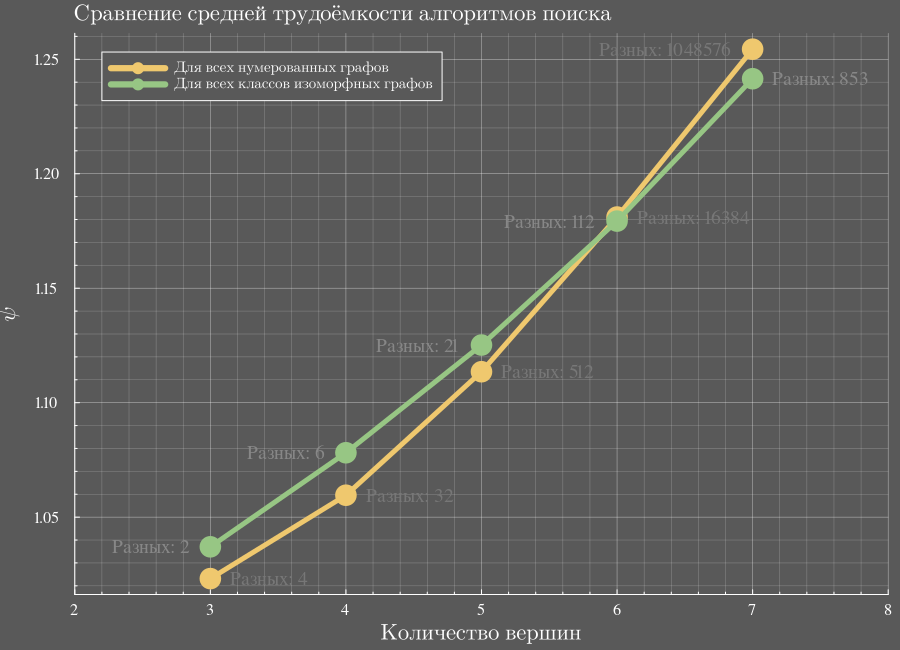

In [6]:
plot(ψ_all,
    title = L"Сравнение\ средней\ трудоёмкости\ алгоритмов\ поиска",    
    titlepos = :left,
    titlefontsize = 15,
    legend = :topleft,
    legendfontsize = 10,
    label = L"Для\ всех\ нумерованных\ графов",
    size = (900, 650),
    
    xlims = (2,8),
#     ylims = (0.99,1.085),
    
    xaxis = L"Количество\ вершин",
    yaxis = L"\psi",
    markersize = 12,
#     alpha = 0.8,
    minorgrid = true,
    minorgridalpha = 0.3,
    gridalpha = 0.6,
    linewidth = 5,
    palette = :Derain,
    background_color = :grey35,
    labelfontsize = 15,
    marker = :circle,
    xtickfont = font(10, "Times", :white),
    ytickfont = font(10, "Times", :white),
    
    markerstrokewidth = 0,
)

annotate!(
    vcat(
        [(n+0.15, ψ_all[n],("Разных: $(length(allGraphs[n]))", 12, :left, "Times", "#d8b971",)) for n in 3:6],
        [(7-0.15, ψ_all[7], ("Разных: $(length(allGraphs[7]))", 12, :right, "Times", "#d8b971",))]
    )
)


plot!(ψ_iso,
    label = L"Для\ всех\ классов\ изоморфных\ графов",
    markersize = 12,
    linewidth = 5,
#     alpha = 0.8,
    marker = :circle,
    markerstrokewidth = 0,
)
annotate!(
    vcat(
        [(n-0.15, ψ_iso[n],("Разных: $(length(isoGraphs[n]))", 12, :right, "Times", "#91b782",)) for n in 3:6],
        [(7+0.15, ψ_iso[7],("Разных: $(length(isoGraphs[7]))", 12, :left, "Times", "#91b782",))]
    )
)

In [7]:
savefig("plots/psi_all_isomorph_classes.svg");